In [ ]:
!pip install loguru
!pip install pycaret[full]
!pip install lxml
!pip install tsfresh

     |████████████████████████████████| 57 kB 9.3 MB/s 
     |████████████████████████████████| 261 kB 13.7 MB/s 
     |████████████████████████████████| 1.3 MB 35.6 MB/s 
     |████████████████████████████████| 371 kB 35.7 MB/s 
     |████████████████████████████████| 10.5 MB 33.4 MB/s 
     |████████████████████████████████| 2.0 MB 36.4 MB/s 
     |████████████████████████████████| 14.2 MB 34.0 MB/s 
     |████████████████████████████████| 248 kB 63.7 MB/s 
     |████████████████████████████████| 121 kB 86.1 MB/s 
     |████████████████████████████████| 81 kB 17.0 MB/s 
     |████████████████████████████████| 6.8 MB 71.7 MB/s 
     |████████████████████████████████| 80 kB 22.8 MB/s 
     |████████████████████████████████| 56 kB 12.4 MB/s 
     |████████████████████████████████| 271 kB 81.2 MB/s 
     |████████████████████████████████| 24.2 MB 62.3 MB/s 
     |████████████████████████████████| 1.7 MB 66.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build w

In [ ]:
from src.helpers.experiment import create_tsfresh_dataframe
from src.helpers.diabetes.cega import clarke_error_grid
from pycaret.regression import setup, create_model, compare_models, predict_model
from loguru import logger

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


def mean_adjusted_exponent_error(y_true, y_pred, center=125, critical_range=55, slope=100, verbose=False):
    def exponent(y_hat: float, y_i: float, a=center, b=critical_range, c=slope) -> float:
        return 2 - np.tanh(((y_i - a) / b)) * ((y_hat - y_i) / c)
    sum_ = 0
    for i in range(len(y_true)):
        exp = exponent(y_pred[i], y_true[i])
        if verbose:
            print(exp)
        sum_ += abs((y_pred[i] - y_true[i])) ** exp
    return sum_ / len(y_true)


def graph_vs_mse(value, value_range, action=None, save_folder='.'):
    prediction = np.arange(value - value_range, value + value_range)
    errors = []
    mse = []
    for pred in prediction:
        errors.append(mean_adjusted_exponent_error([value], [pred]))
        mse.append(mean_squared_error([value], [pred]))
    plt.plot(prediction, errors, label='madex')
    plt.plot(prediction, mse, label='mse', ls='dotted')
    plt.axvline(value, label='Reference Value', color='k', ls='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Error')
    plt.title('{} +- {}'.format(value, value_range))
    plt.legend()
    if action == 'save':
        plt.savefig(
            f'{save_folder}/compare_vs_mse({value}+-{value_range}).png')
        plt.clf()
    else:
        return plt

In [ ]:
parameters = {
    'ohio_no': 559,
    'scope': 'train',
    'train_ds_size': 3000,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}

2021-06-17 11:41:21.752 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_train_3000_6_1.pkl
2021-06-17 11:41:21.816 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'train', 'train_ds_size': 3000, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


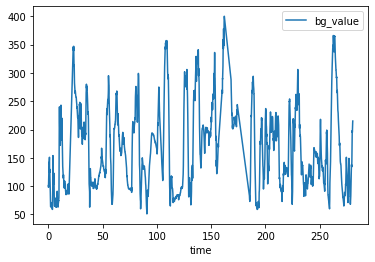

2021-06-17 11:41:22.145 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-17 11:41:22.146 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_train_3000_6_1.pkl


,bg_value__variance_larger_than_standard_deviation,bg_value__has_duplicate_max,bg_value__has_duplicate_min,bg_value__has_duplicate,bg_value__sum_values,bg_value__abs_energy,bg_value__mean_abs_change,bg_value__mean_change,bg_value__mean_second_derivative_central,bg_value__median,bg_value__mean,bg_value__length,bg_value__standard_deviation,bg_value__variation_coefficient,bg_value__variance,bg_value__skewness,bg_value__kurtosis,bg_value__root_mean_square,bg_value__absolute_sum_of_changes,bg_value__longest_strike_below_mean,bg_value__longest_strike_above_mean,bg_value__count_above_mean,bg_value__count_below_mean,bg_value__last_location_of_maximum,bg_value__first_location_of_maximum,bg_value__last_location_of_minimum,bg_value__first_location_of_minimum,bg_value__percentage_of_reoccurring_values_to_all_values,bg_value__percentage_of_reoccurring_datapoints_to_all_datapoints,bg_value__sum_of_reoccurring_values,bg_value__sum_of_reoccurring_data_points,bg_value__ratio_value_number_to_time_series_length,bg_value__sample_entropy,bg_value__maximum,bg_value__minimum,bg_value__benford_correlation,bg_value__time_reversal_asymmetry_statistic__lag_1,bg_value__time_reversal_asymmetry_statistic__lag_2,bg_value__time_reversal_asymmetry_statistic__lag_3,bg_value__c3__lag_1,bg_value__c3__lag_2,bg_value__c3__lag_3,bg_value__cid_ce__normalize_True,bg_value__cid_ce__normalize_False,bg_value__symmetry_looking__r_0.0,bg_value__symmetry_looking__r_0.05,bg_value__symmetry_looking__r_0.1,bg_value__symmetry_looking__r_0.15000000000000002,bg_value__symmetry_looking__r_0.2,bg_value__symmetry_looking__r_0.25,bg_value__symmetry_looking__r_0.30000000000000004,bg_value__symmetry_looking__r_0.35000000000000003,bg_value__symmetry_looking__r_0.4,bg_value__symmetry_looking__r_0.45,bg_value__symmetry_looking__r_0.5,bg_value__symmetry_looking__r_0.55,bg_value__symmetry_looking__r_0.6000000000000001,bg_value__symmetry_looking__r_0.65,bg_value__symmetry_looking__r_0.7000000000000001,bg_value__symmetry_looking__r_0.75,bg_value__symmetry_looking__r_0.8,bg_value__symmetry_looking__r_0.8500000000000001,bg_value__symmetry_looking__r_0.9,bg_value__symmetry_looking__r_0.9500000000000001,bg_value__large_standard_deviation__r_0.05,bg_value__large_standard_deviation__r_0.1,bg_value__large_standard_deviation__r_0.15000000000000002,bg_value__large_standard_deviation__r_0.2,bg_value__large_standard_deviation__r_0.25,bg_value__large_standard_deviation__r_0.30000000000000004,bg_value__large_standard_deviation__r_0.35000000000000003,bg_value__large_standard_deviation__r_0.4,bg_value__large_standard_deviation__r_0.45,bg_value__large_standard_deviation__r_0.5,bg_value__large_standard_deviation__r_0.55,bg_value__large_standard_deviation__r_0.6000000000000001,bg_value__large_standard_deviation__r_0.65,bg_value__large_standard_deviation__r_0.7000000000000001,bg_value__large_standard_deviation__r_0.75,bg_value__large_standard_deviation__r_0.8,bg_value__large_standard_deviation__r_0.8500000000000001,bg_value__large_standard_deviation__r_0.9,bg_value__large_standard_deviation__r_0.9500000000000001,bg_value__quantile__q_0.1,bg_value__quantile__q_0.2,bg_value__quantile__q_0.3,bg_value__quantile__q_0.4,bg_value__quantile__q_0.6,bg_value__quantile__q_0.7,bg_value__quantile__q_0.8,bg_value__quantile__q_0.9,bg_value__autocorrelation__lag_0,bg_value__autocorrelation__lag_1,bg_value__autocorrelation__lag_2,bg_value__autocorrelation__lag_3,bg_value__autocorrelation__lag_4,bg_value__autocorrelation__lag_5,bg_value__autocorrelation__lag_6,bg_value__autocorrelation__lag_7,bg_value__autocorrelation__lag_8,bg_value__autocorrelation__lag_9,"bg_value__agg_autocorrelation__f_agg_""mean""__maxlag_40","bg_value__agg_autocorrelation__f_agg_""median""__maxlag_40","bg_value__agg_autocorrelation__f_agg_""var""__maxlag_40",bg_value__partial_autocorrelation__lag_0,bg_value__partial_autocorrelation__lag_1,bg_value__partial_autocorrelation__lag_2,bg_value__partial_autocorrelation__lag_3,bg_value__partial_autocorrelation__

In [ ]:
df2 = create_tsfresh_dataframe(parameters)
df3 = df2.drop(columns=['start', 'end', 'start_time', 'end_time'])
df3

In [ ]:
exp_reg = setup(df3,
                    target='label',
                    feature_selection=True,
                    html=True,
                    silent=True
                    )

,Description,Value
0,session_id,2345
1,Target,label
2,Original Data,"(2994, 788)"
3,Missing Values,True
4,Numeric Features,260
5,Categorical Features,527
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2095, 223)"


In [ ]:
best3 = compare_models(
    exclude=['catboost', 'xgboost'],
    sort='RMSE',
    n_select=3,
    # verbose=False
)
logger.info(best3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.5701,102.9995,9.5219,0.9807,0.0594,0.0300,4.3530
rf,Random Forest Regressor,4.7897,106.8684,9.6381,0.9800,0.0596,0.0310,8.8500
omp,Orthogonal Matching Pursuit,4.4661,117.4169,9.7863,0.9773,0.0608,0.0297,0.0300
gbr,Gradient Boosting Regressor,4.9066,111.3788,9.8533,0.9791,0.0626,0.0328,3.6300
lightgbm,Light Gradient Boosting Machine,4.9067,113.3873,9.9753,0.9788,0.0622,0.0322,1.2720
dt,Decision Tree Regressor,7.3960,191.8824,13.4432,0.9637,0.0818,0.0470,0.1710
knn,K Neighbors Regressor,7.5831,199.8118,13.6911,0.9627,0.0913,0.0518,0.1240
en,Elastic Net,4.8892,575.8399,16.9526,0.8955,0.0841,0.0324,0.1210
lasso,Lasso Regression,4.8921,623.9454,17.2066,0.8873,0.0804,0.0324,0.1190
ada,AdaBoost Regressor,14.3886,356.5218,18.7916,0.9323,0.1409,0.1103,1.5260


2021-06-17 11:46:12.651 | INFO     | __main__:<module>:7 - [ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2345, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_sta

In [ ]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.5564,58.4778,7.6471,0.9891,0.0477,0.0297
1,4.5455,54.1328,7.3575,0.9884,0.0503,0.0312
2,4.8982,169.2288,13.0088,0.9704,0.0875,0.0373
3,4.0875,50.3167,7.0934,0.9916,0.0496,0.0270
4,4.1600,52.7523,7.2631,0.9893,0.0423,0.0267
5,4.7715,77.2700,8.7903,0.9860,0.0428,0.0283
6,4.9599,100.0513,10.0026,0.9808,0.0761,0.0357
7,4.2908,55.1328,7.4251,0.9885,0.0384,0.0267
8,5.1954,349.7742,18.7023,0.9347,0.1001,0.0273
9,4.2359,62.8588,7.9284,0.9881,0.0597,0.0300


In [ ]:
pd = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.4647,59.9367,7.7419,0.9883,0.0518,0.0296


(<module 'matplotlib.pyplot' from '/shared-libs/python3.8/py/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 [886, 12, 0, 1, 0])

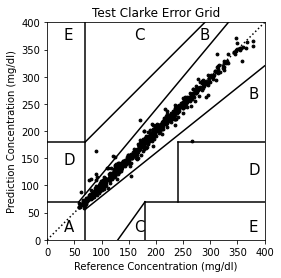

In [ ]:
clarke_error_grid(pd['label'], pd['Label'], 'Test')

2021-06-17 11:49:19.205 | INFO     | src.helpers.experiment:create_ds_name:12 - dataframes/559_test_100000_6_1.pkl
2021-06-17 11:49:19.225 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:19 - {'ohio_no': 559, 'scope': 'test', 'train_ds_size': 100000, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False}


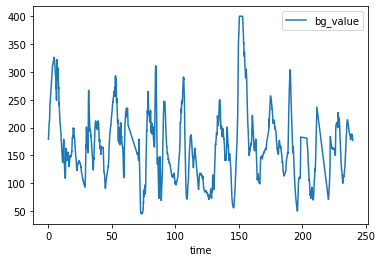

2021-06-17 11:49:19.420 | INFO     | src.helpers.experiment:create_tsfresh_dataframe:22 - Found existing picle file. Continuing...
2021-06-17 11:49:19.422 | INFO     | src.helpers.dataframe:read_df:11 - Attempting to read from pickle file dataframes/559_test_100000_6_1.pkl


(<module 'matplotlib.pyplot' from '/shared-libs/python3.8/py/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 [2489, 14, 1, 4, 0])

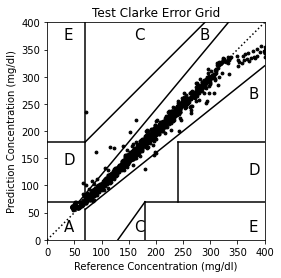

In [ ]:
test_parameters = {
    'ohio_no': 559,
    'scope': 'test',
    'train_ds_size': 100000,
    'window_size': 6,
    'prediction_horizon': 1,
    'minimal_features': False,
}
df4 = create_tsfresh_dataframe(test_parameters)
df6 = df4.drop(columns=['start', 'end', 'start_time', 'end_time'])
pd2 = predict_model(model, data=df6)
clarke_error_grid(pd2['label'], pd2['Label'], 'Test')

In [ ]:
np.sqrt(mean_squared_error(pd2['label'], pd2['Label']))

9.769962884818636

In [ ]:
mean_adjusted_exponent_error(pd2['label'], pd2['Label'])

6337.632681481813

In [ ]:
from pycaret.regression import get_metrics
get_metrics(model).loc['rmse']

Name                                                            RMSE
Display Name                                                    RMSE
Score Function       <function mean_squared_error at 0x7fcab8b89b80>
Scorer                                   neg_root_mean_squared_error
Target                                                          pred
Args                                              {'squared': False}
Greater is Better                                              False
Custom                                                         False
Name: rmse, dtype: object

In [ ]:
from pycaret.regression import blend_models
blended = blend_models(best3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.9312,43.1523,6.5690,0.9919,0.0410,0.0256
1,4.1397,46.5574,6.8233,0.9901,0.0503,0.0296
2,4.5089,159.0724,12.6124,0.9721,0.0850,0.0347
3,3.9875,48.9210,6.9944,0.9918,0.0506,0.0266
4,3.8532,38.6505,6.2170,0.9922,0.0384,0.0259
5,4.2582,45.9458,6.7783,0.9917,0.0355,0.0254
6,4.4766,57.2541,7.5666,0.9890,0.0558,0.0308
7,4.1105,61.9957,7.8737,0.9871,0.0366,0.0250
8,5.0089,357.5306,18.9085,0.9333,0.1002,0.0259
9,3.7121,36.8598,6.0712,0.9930,0.0455,0.0262


(<module 'matplotlib.pyplot' from '/shared-libs/python3.8/py/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 [2491, 13, 1, 3, 0])

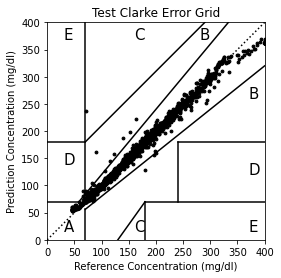

In [ ]:
pd3 = predict_model(blended, data=df6)
clarke_error_grid(pd3['label'], pd3['Label'], 'Test')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d560f233-0034-499f-bc4e-7ada8795cb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>